<a href="https://colab.research.google.com/github/ArpitAwasthi2411/Machine-Learning/blob/main/MachineLearningLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(23010503012)

23010503012


# Practical 1: Pandas Library#
Python program to import and export data using Panda's Library Function

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stock_data.csv",na_values=['n.a.','not available'])

In [ ]:
df.shape

(5, 5)

In [ ]:
d = df.fillna('-')
print(d)

  tickers    eps  revenue   price         people
0   GOOGL  27.82       87   845.0     larry page
1     WMT   4.61      484    65.0              -
2    MSFT   -1.0       85    64.0     bill gates
3    RIL       -       50  1023.0  mukesh ambani
4    TATA    5.6       -1       -     ratan tata


In [ ]:
f = d.to_csv("/content/drive/MyDrive/cleaned_stock_data.csv")
print(f)

None


In [ ]:
d.describe()

,revenue
count,5.000000
mean,141.000000
std,195.029485
min,-1.000000
25%,50.000000
50%,85.000000
75%,87.000000
max,484.000000


In [ ]:
d.head(2)


,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,-


In [ ]:
d.tail(3)

,tickers,eps,revenue,price,people
2,MSFT,-1.0,85,64.0,bill gates
3,RIL,-,50,1023.0,mukesh ambani
4,TATA,5.6,-1,-,ratan tata


In [ ]:
d[0:3]

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,-
2,MSFT,-1.0,85,64.0,bill gates


In [ ]:
d[0:3][['eps','revenue']]

,eps,revenue
0,27.82,87
1,4.61,484
2,-1.0,85


In [ ]:
total_revenue = d['revenue'].sum()
print(total_revenue)

705


In [ ]:
print(d)

  tickers    eps  revenue   price         people
0   GOOGL  27.82       87   845.0     larry page
1     WMT   4.61      484    65.0              -
2    MSFT   -1.0       85    64.0     bill gates
3    RIL       -       50  1023.0  mukesh ambani
4    TATA    5.6       -1       -     ratan tata


In [ ]:
d.iloc[:,0:3]

,tickers,eps,revenue
0,GOOGL,27.82,87
1,WMT,4.61,484
2,MSFT,-1.0,85
3,RIL,-,50
4,TATA,5.6,-1


# Practical 2 : Data Preprocessing #
Various Data Preprocessing Techniques for a given dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
sns.set(style="whitegrid")


In [ ]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns= iris.feature_names)
y = pd.Series(iris.target, name="target")

In [ ]:
x.iloc[0:5,0] = np.nan

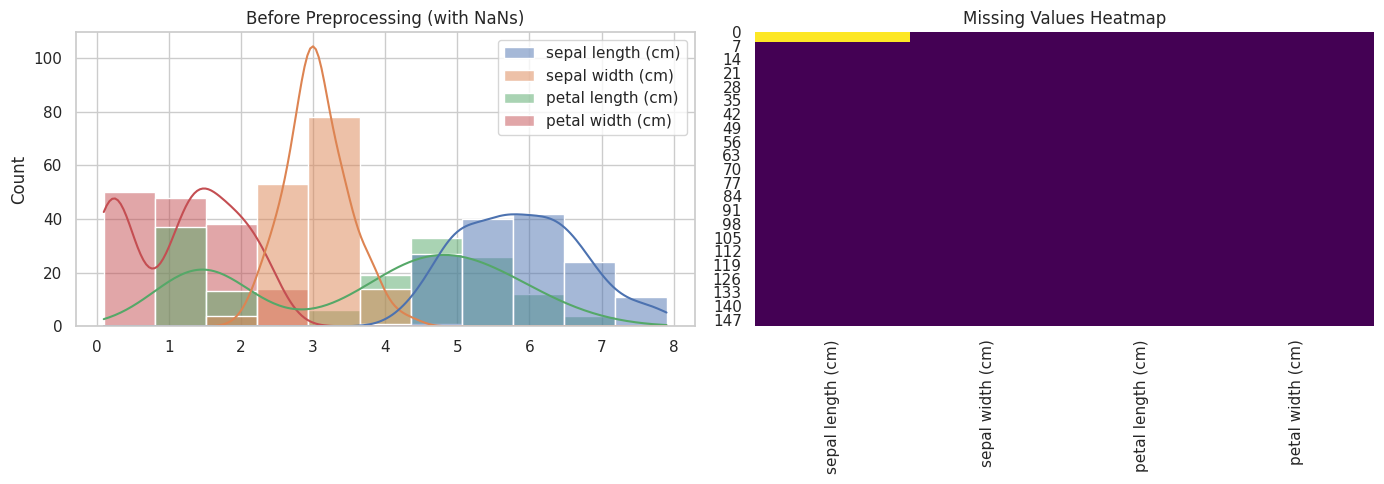

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=x, kde=True, legend=True)
plt.title("Before Preprocessing (with NaNs)")
plt.subplot(1, 2, 2)
sns.heatmap(x.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

In [ ]:
scaler_std = StandardScaler()
X_scaled_std = pd.DataFrame(scaler_std.fit_transform(X_imputed), columns=x.columns)
scaler_minmax = MinMaxScaler()
X_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(X_imputed), columns=x.columns)


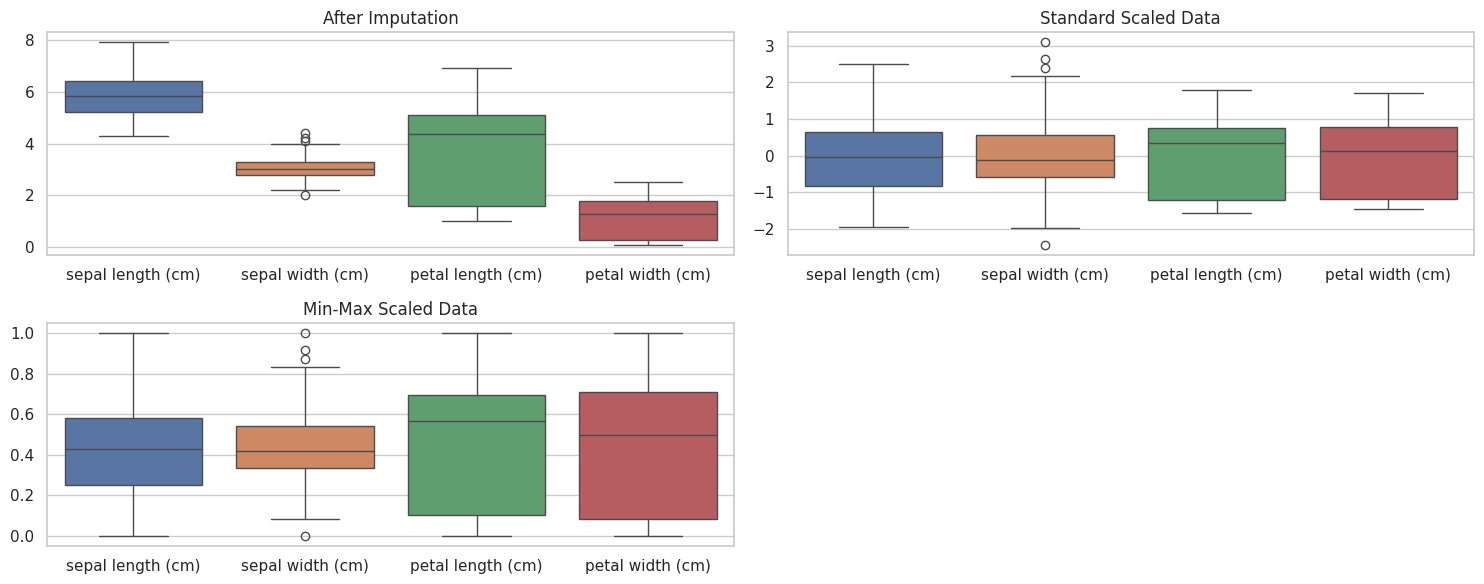

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.boxplot(data=X_imputed)
plt.title("After Imputation")
plt.subplot(2, 2, 2)
sns.boxplot(data=X_scaled_std)
plt.title("Standard Scaled Data")
plt.subplot(2, 2, 3)
sns.boxplot(data=X_scaled_minmax)
plt.title("Min-Max Scaled Data")
plt.tight_layout()
plt.show()

In [ ]:
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled_std, y)
selected_features = selector.get_support(indices=True)
selected_feature_names = [x.columns[i] for i in selected_features]

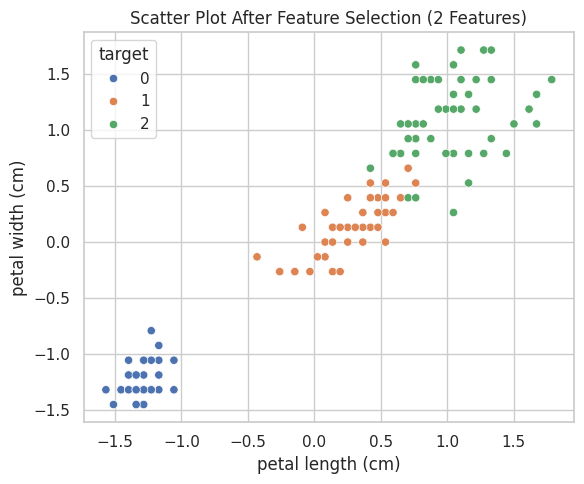

In [ ]:
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)
X_selected_df['target'] = y

plt.figure(figsize=(6, 5))
sns.scatterplot(data=X_selected_df, x=selected_feature_names[0], y=selected_feature_names[1], hue='target', palette='deep')
plt.title("Scatter Plot After Feature Selection (2 Features)")
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
print("Final X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)

Final X_train shape: (120, 2)
Final X_test shape: (30, 2)


## Demostrating one hot encoding

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [ ]:
X['plant_type'] = ['wild' if t == 0 else 'hybrid' if t == 1 else 'domestic' for t in y]


In [ ]:
print(" Before One-Hot Encoding (value counts):")
print(X['plant_type'].value_counts())

 Before One-Hot Encoding (value counts):
plant_type
wild        50
hybrid      50
domestic    50
Name: count, dtype: int64


/tmp/ipython-input-18-2366793111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x='plant_type', palette='Set2')


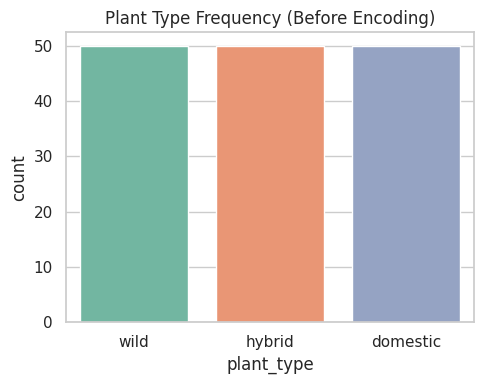

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=X, x='plant_type', palette='Set2')
plt.title("Plant Type Frequency (Before Encoding)")
plt.tight_layout()
plt.show()

In [ ]:
X_encoded = pd.get_dummies(X, columns=['plant_type'], prefix='plant')

In [ ]:
print("\n After One-Hot Encoding (Random 5 Samples):")
print(X_encoded.filter(like='plant_').sample(5, random_state=1))


 After One-Hot Encoding (Random 5 Samples):
     plant_domestic  plant_hybrid  plant_wild
14            False         False        True
98            False          True       False
75            False          True       False
16            False         False        True
131            True         False       False


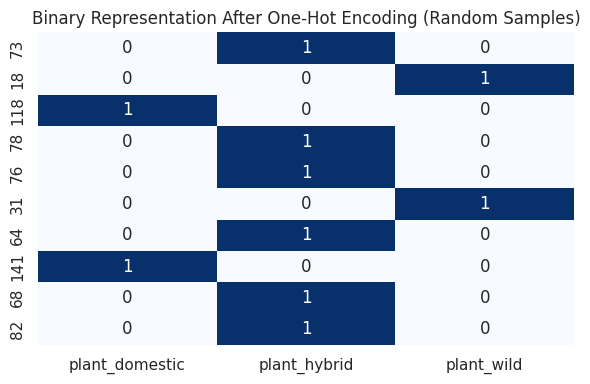

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(X_encoded.filter(like='plant_').sample(10, random_state=42),
            annot=True, cbar=False, cmap='Blues')
plt.title("Binary Representation After One-Hot Encoding (Random Samples)")
plt.tight_layout()
plt.show()

# Practical 3 : Linear Regression

## Siimple Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/houseprice')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


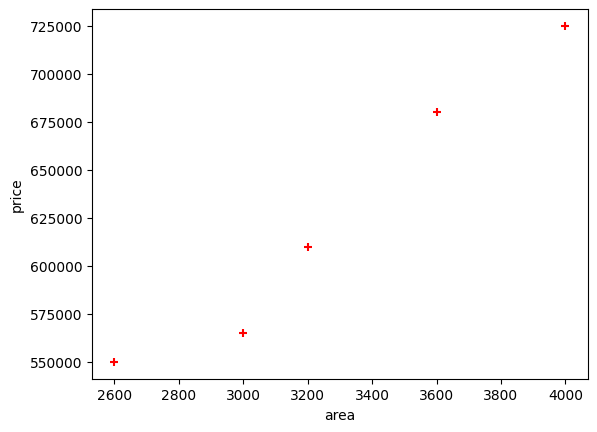

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
x = df.drop('price',axis='columns')
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
y = df.price
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [6]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [7]:
y_pred_train=reg.predict(x)
y_pred_train

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [9]:
c=reg.intercept_
c


np.float64(180616.43835616432)

In [10]:
m=reg.coef_
m

array([135.78767123])

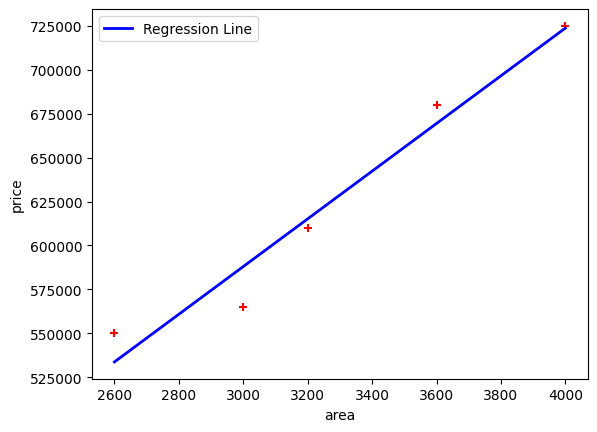

In [11]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(x, y,color='red',marker='+')
plt.plot(x, y_pred_train, color='blue', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

In [12]:
import numpy as np
a = np.array([3300,4400,4500,5500])
a_2d = a.reshape(-1, 1)
c = reg.predict(a_2d)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
s=pd.DataFrame(a)
s


,0
0,3300
1,4400
2,4500
3,5500


In [18]:
x_test=s

In [19]:
y_pred = reg.predict(x_test)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466, 778082.19178082, 791660.95890411, 927448.63013699])

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred_train)
print(f'R-squared: {r2}')

R-squared: 0.9584301138199486


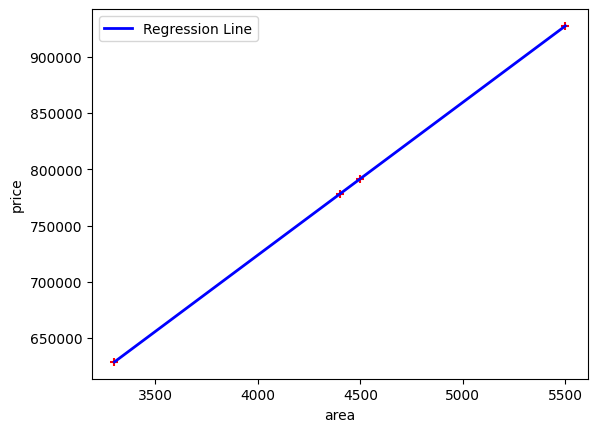

In [21]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(x_test,y_pred,color='red',marker='+')
plt.plot(x_test,y_pred, color='blue', linewidth=2, label='Regression Line')
plt.legend()
plt.show()
plt.show()

## Multiple linear regression


In [22]:
df = pd.read_csv('/content/drive/MyDrive/California.csv')
df


,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...,...
2995,2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [23]:
x1 = df.drop('median_house_value',axis='columns')
x1

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...,...
2995,2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [24]:
x=x1.iloc[:,1 :]
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [27]:
y = df.iloc[:,-1:]
y

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0
...,...
2995,225000.0
2996,237200.0
2997,62000.0
2998,162500.0


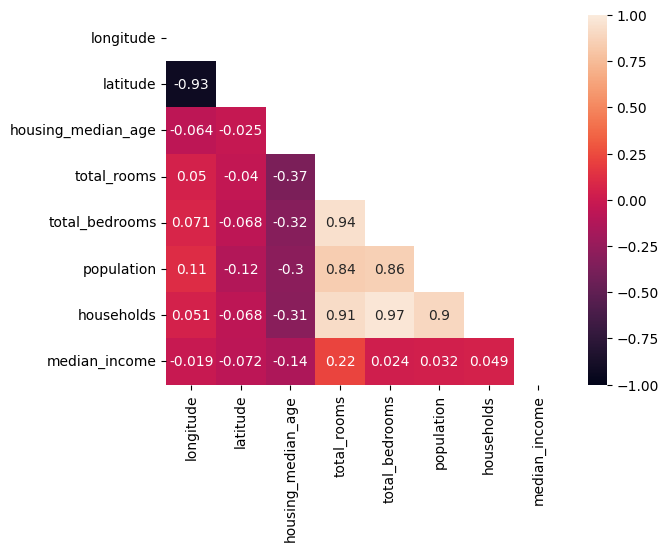

In [25]:
import seaborn as sns
cor=x.corr()
mask1=np.triu(np.ones_like(cor))
sns.heatmap(x.corr(),annot=True,vmin=-1,vmax=1,mask=mask1)
plt.show()

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:",len(X_test))

Training set size: 2400
Testing set size: 600


In [29]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred_train=reg.predict(X_train)
y_pred_train

array([[142624.19253218],
       [247944.78071128],
       [126361.37485293],
       ...,
       [221631.37080943],
       [200137.16973222],
       [297753.39882791]])

In [37]:
y_pred_test=reg.predict(X_test)


In [39]:
r2t = r2_score(y_train, y_pred_train)
print(f'R-squared: {r2t}')

R-squared: 0.6157997463644627


In [38]:
r2 = r2_score(y_test, y_pred_test)
print(f'R-squared: {r2}')

R-squared: 0.6358044169850408
